In [2]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [3]:
#get dataset
X,y=mglearn.datasets.make_wave(n_samples=40)

In [4]:
#split the data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [5]:
#instantiate the model
reg=KNeighborsRegressor(n_neighbors=3)

#fit the model
reg.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=3)

In [8]:
print("Test set Predictions:\n",reg.predict(X_test))

Test set Predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [13]:
print("Test set R^2: {:.2f}%".format(reg.score(X_test,y_test)*100))

Test set R^2: 83.44%


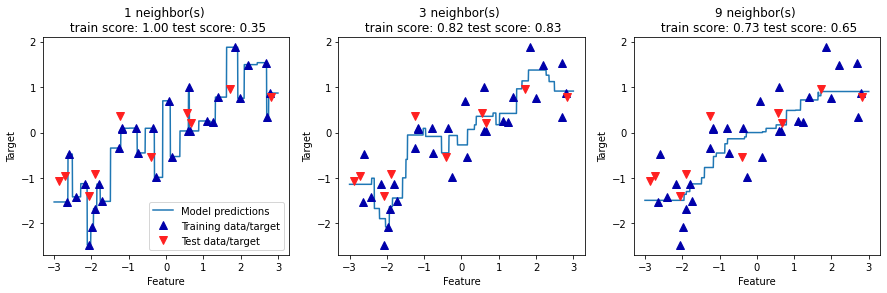

In [21]:
fig,axes=plt.subplots(1,3,figsize=(15,4))
#create new test dataset, 1000 points evenly spaced between -3 and 3
line=np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9],axes):
    # make predictions using 1,3 or 9 neighbors
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    ax.set_title("{} neighbor(s) \n train score: {:.2f} test score: {:.2f}".format(n_neighbors,
                reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions","Training data/target","Test data/target"],loc="best")